In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path = "/gdrive/My Drive/oasis_longitudinal.csv"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'figure.max_open_warning': 0})

sns.set()
df = pd.read_csv('oasis_longitudinal.csv')
df.head()


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
df = df.loc[df['Visit'] == 1 ]
df = df.reset_index(drop=True)
df['Group'] = df['Group'].replace(['Converted'],['Demented'])
df['Group'] = df['Group'].replace(['Demented','Nondemented'], [1,0])
df['M/F'] = df['M/F'].replace(['F','M'],[1,0]).apply(pd.to_numeric)
df = df.drop(['Subject ID','MRI ID', 'Visit', 'Hand','MR Delay'], axis=1)
df.head()


,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,0,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,0,1,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,0,0,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,1,0,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [ ]:
def bar_chart(feature):
  Demented = df[df['Group']==1][feature].value_counts()
  Nondemented = df[df['Group']==0][feature].value_counts()
  df_bar = pd.DataFrame([Demented, Nondemented])
  df_bar.index = ['Demented','Nondemented']
  df_bar.plot(kind='bar',stacked=True, figsize=(8,5), color=['cornflowerblue','plum'])


Text(0.5, 1.0, 'Gender and Demented rate')

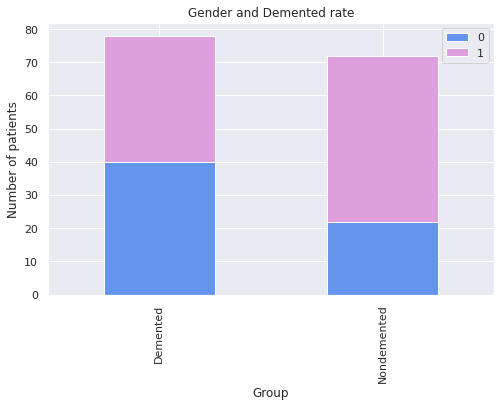

In [ ]:
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')

In [ ]:
pd.isnull(df).sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      8
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

In [ ]:
df['SES'].value_counts()

2.0    42
3.0    34
1.0    33
4.0    30
5.0     3
Name: SES, dtype: int64

In [ ]:
df['SES'] = df['SES'].fillna(2.0)

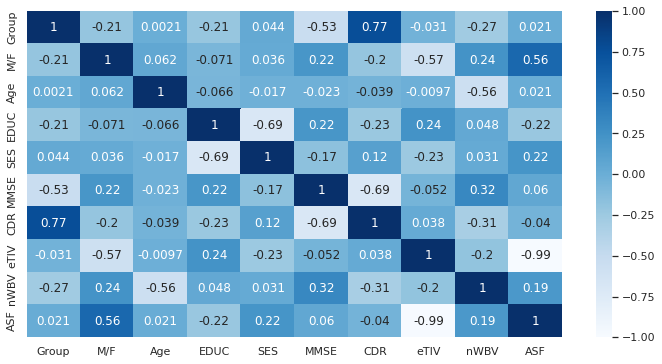

In [ ]:
corr = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr,cmap="Blues", annot=True, vmin=-1)
plt.show()

In [ ]:
df = df.drop(['ASF'], axis=1)

In [ ]:
df.loc[:,"EDUC"]

0      14
1      12
2      18
3      12
4      16
       ..
145    12
146    13
147    16
148    16
149    13
Name: EDUC, Length: 150, dtype: int64

In [ ]:
df2= pd.DataFrame(df,columns=['EDUC'])
df2=df.assign(EDUC=pd.cut(df['EDUC'],bins=[5,8,12,18,23],labels=['Primary School','High School','Bachelors','Postgraduate']))
df=df2

In [ ]:
df.loc[:,"EDUC"].value_counts()

Bachelors         91
High School       48
Postgraduate       6
Primary School     5
Name: EDUC, dtype: int64

In [ ]:
df.dtypes

Group       int64
M/F         int64
Age         int64
EDUC     category
SES       float64
MMSE      float64
CDR       float64
eTIV        int64
nWBV      float64
dtype: object

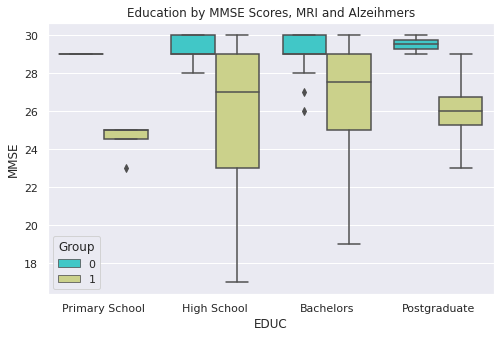

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='EDUC',y='MMSE',data=df, palette='rainbow',hue='Group')
plt.title("Education by MMSE Scores, MRI and Alzeihmers")
plt.show()

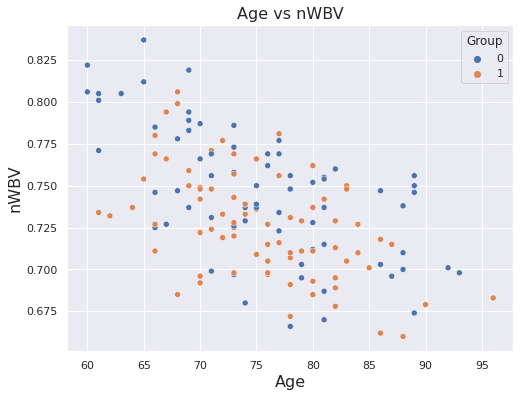

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='nWBV', data=df, hue='Group')
plt.title('Age vs nWBV', size=16)
plt.xlabel('Age', size=16)
plt.ylabel('nWBV', size=16)
plt.show()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
edu = ['Primary School', 'High School', 'Bachelors', 'Postgraduate']
ordi = OrdinalEncoder(categories=[edu])
df["EDUC"]=ordi.fit_transform(df[['EDUC']])

In [ ]:
df.loc[:,"EDUC"].value_counts()

2.0    91
1.0    48
3.0     6
0.0     5
Name: EDUC, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV"]
predicted_class_names = ['Group']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import scale, StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, accuracy_score, recall_score, roc_curve, auc
from sklearn.metrics import classification_report

knn = KNeighborsClassifier()

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)

grid_search=grid.fit(X_train_scaled, np.ravel(y_train))
print(grid_search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'n_neighbors': 14}


In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=14)

knn2.fit(X_train_scaled, y_train)

y_pred=knn2.predict(X_test_scaled) 

test_accuracy=accuracy_score(np.ravel(y_test),y_pred)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 73.33%


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


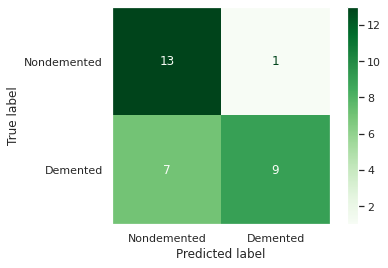

In [ ]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
plot_confusion_matrix(knn2,X_test_scaled, y_test,values_format='d', display_labels=['Nondemented', 'Demented'],cmap="Greens")
plt.grid(None)
plt.show()

In [ ]:
target_names = ['Nondemented','Demented']
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

 Nondemented       0.65      0.93      0.76        14
    Demented       0.90      0.56      0.69        16

    accuracy                           0.73        30
   macro avg       0.78      0.75      0.73        30
weighted avg       0.78      0.73      0.73        30



In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
param_grid = [
    {'C': [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 30, 50, 80, 100],
    'gamma': ['scale', 0.5, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
]
svm_cv = GridSearchCV(estimator=svm, param_grid=param_grid, cv= 5)
svm_cv.fit(X_train_scaled, np.ravel(y_train))
svm_cv.best_params_


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 30, 'gamma': 0.01, 'kernel': 'sigmoid'}

In [ ]:
svm2 = SVC(random_state=42, C=30, gamma=0.01, kernel='sigmoid')
svm2.fit(X_train_scaled, y_train)

y_pred_2=svm2.predict(X_test_scaled) 

test_accuracy_2=accuracy_score(np.ravel(y_test),y_pred_2)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy_2) )



Accuracy for our testing dataset with tuning is : 70.00%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


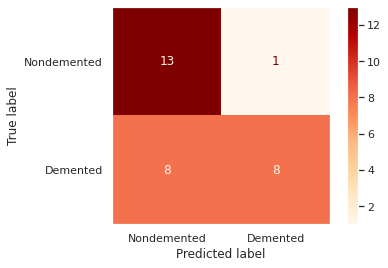

In [ ]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
plot_confusion_matrix(svm2,X_test_scaled, y_test,values_format='d', display_labels=['Nondemented', 'Demented'],cmap="OrRd")
plt.grid(None)
plt.show()

In [ ]:
target_names = ['Nondemented','Demented']
print(classification_report(y_test,y_pred_2,target_names=target_names))

              precision    recall  f1-score   support

 Nondemented       0.62      0.93      0.74        14
    Demented       0.89      0.50      0.64        16

    accuracy                           0.70        30
   macro avg       0.75      0.71      0.69        30
weighted avg       0.76      0.70      0.69        30



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier().fit(X_train_scaled, y_train)

param_grid = {'criterion': ['gini'], 
              'max_depth': range(1,10)}
dt_cv=GridSearchCV(estimator=dt_model, param_grid=param_grid, cv= 5)
dt_cv.fit(X_train_scaled, np.ravel(y_train))
dt_cv.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [ ]:
dt2=DecisionTreeClassifier(random_state=42, criterion="gini", max_depth=1)
dt2.fit(X_train_scaled, np.ravel(y_train))
y_pred_3=dt2.predict(X_test_scaled)
test_accuracy_3=accuracy_score(np.ravel(y_test),y_pred_3)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy_3))

Accuracy for our testing dataset with tuning is : 76.67%


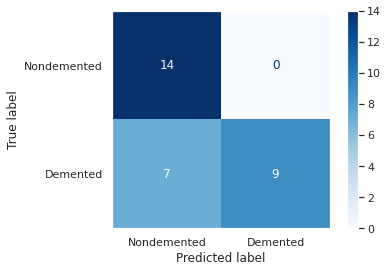

In [ ]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
plot_confusion_matrix(dt2,X_test_scaled, y_test,values_format='d', display_labels=['Nondemented', 'Demented'],cmap="Blues")
plt.grid(None)
plt.show()

In [ ]:
target_names = ['Nondemented','Demented']
print(classification_report(y_test,y_pred_3,target_names=target_names))

              precision    recall  f1-score   support

 Nondemented       0.67      1.00      0.80        14
    Demented       1.00      0.56      0.72        16

    accuracy                           0.77        30
   macro avg       0.83      0.78      0.76        30
weighted avg       0.84      0.77      0.76        30



In [ ]:
knn2_fpr, knn2_tpr, thresholds = roc_curve(y_test, y_pred)
svm2_fpr, svm2_tpr, theresholds = roc_curve(y_test, y_pred_2)
dt2_fpr, dt2_tpr, theresholds = roc_curve(y_test, y_pred_3)

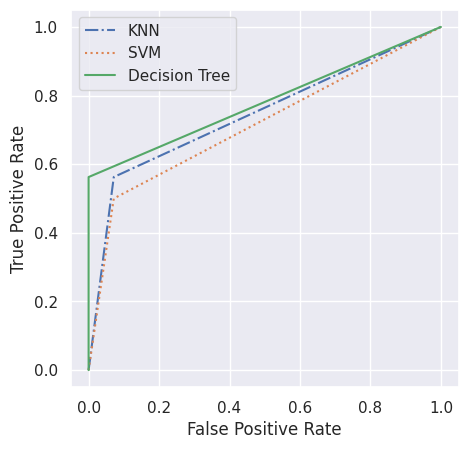

In [ ]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(knn2_fpr, knn2_tpr, linestyle='-.', label='KNN')
plt.plot(svm2_fpr, svm2_tpr, linestyle=':', label='SVM')
plt.plot(dt2_fpr, dt2_tpr, linestyle='-', label='Decision Tree')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()